# Aprendizaje Automático I - Trabajo práctico 2

**Grado en Ciencia e Ingeniería de Datos - 22/23 de abril de 2025**

## Descripción del problema

En la fauna marina existen multitud de especies de peces cada uno con una morfología (forma), colores o textura diferente, que en general nos permite identificarlos, aunque en algunos casos pueda ser difícil incluso para expertos. 

En este caso nos centramos en comprobar si mediante técnicas de Aprendizaje Automático se pueden diferenciar un conjunto reducido de especies haciendo uso solamente de medidas morfológicas. 

Concretamente se van a considerar las siguientes especies: dorada, rutilo, salmón, carpa, perca, lucio y capellán. De cada pez se han obtenido seis medidas que incluyen diferentes longitudes así como el peso. Los datos se encuentran almacenados en un archivo con formato csv denominado *peces.csv*.

La codificación de cada especie en el conjunto de datos es la siguiente:

- 0: Capellan  
- 1: Carpa  
- 2: Dorada  
- 3: Lucio  
- 4: Perca  
- 5: Rutilo  
- 6: Salmon

## Objetivo

El objetivo que se plantea consiste en comprobar el rendimiento, medido como exactitud (tasa de acierto), de distintos métodos estudiados en la asignatura, y presentados en las clases prácticas, en la resolución del problema antes planteado. Para calcular el rendimiento se dividirá el conjunto de datos en entrenamiento (80%) y test (20%) utilizando como semilla el valor 42. A continuación se indican las tareas a realizar para comprobar si se cumple el objetivo planteado:

### Tarea 1 (2 puntos)
Obtener el rendimiento de un clasificador basado en regresión logística con los datos sin preprocesar y también aplicando un escalado lineal. Analizar los resultados.


In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("peces.csv")
X = df.drop(columns=["Especie"])
y = df["Especie"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)
acc = accuracy_score(y_test, log_reg.predict(X_test))
print(f"rendimiento sin escalado lineal: {acc:.4f}")

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)
acc = accuracy_score(y_test, log_reg.predict(X_test))
print(f"rendimiento con escalado lineal: {acc:.4f}")

rendimiento sin escalado lineal: 0.9375
rendimiento con escalado lineal: 0.8125


C:\Users\ercil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El rendimiento sin escaldo lineal es mayor que el rendimiento con escaldo lineal, sin embargo el rendimiento sin escaldo no es util debido al ConvergerceWarning ya que esto significa que no ha terminado de calibrar los pesos dentro de las iteraciones, debido a esto la mejor opción es la que hemos realizado el escalado lineal.

### Tarea 2 (2 puntos)

Obtener el rendimiento de un clasificador basado en el método Perceptrón y comparar con los resultados obtenidos en la Tarea 1 con los datos escalados.

In [28]:
from sklearn.linear_model import Perceptron

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
percep = Perceptron(max_iter=1000)
percep.fit(X_train, y_train)
acc = accuracy_score(y_test, percep.predict(X_test))
print(f"Rendimiento perceptron: {acc*100:.4f}")

Rendimiento perceptron: 87.5000


En este caso el rendimiento del perceptron es mejor que el rendimiento de la regresion logistica, debido a que el perceptron adapta los pesos cuando hay un error, por lo que es el mas adecuado para este dataset

### Tarea 3 (2 puntos)

Entrenar clasificadores basados en el método de los K vecinos más cercanos para valores de K entre 1 y 20, indicado qué número de vecinos es el mejor de acuerdo al rendimiento obtenido. Utilizar los datos escalados.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"KNN (k={k}, accuracy: {acc:.4f})") 

KNN (k=1, accuracy: 0.8438)
KNN (k=2, accuracy: 0.8438)
KNN (k=3, accuracy: 0.8438)
KNN (k=4, accuracy: 0.8438)
KNN (k=5, accuracy: 0.8750)
KNN (k=6, accuracy: 0.8438)
KNN (k=7, accuracy: 0.8438)
KNN (k=8, accuracy: 0.8438)
KNN (k=9, accuracy: 0.8125)
KNN (k=10, accuracy: 0.8125)
KNN (k=11, accuracy: 0.7812)
KNN (k=12, accuracy: 0.7812)
KNN (k=13, accuracy: 0.7812)
KNN (k=14, accuracy: 0.7812)
KNN (k=15, accuracy: 0.7500)
KNN (k=16, accuracy: 0.7812)
KNN (k=17, accuracy: 0.7812)
KNN (k=18, accuracy: 0.7812)
KNN (k=19, accuracy: 0.7812)
KNN (k=20, accuracy: 0.7812)


Se puede apreciar que el mejor valor de K es 5, seguido del 1,2,3,4,6,7, entre todos estos números es mejor elegir el 3 debido a que proporciona una mayor consistencia, debido a esto los valores de K que son mas optimos son 3 y 5

### Tarea 4 (2 puntos)

Entrenar tres clasificadores basados en la máquina de vectores soporte, cada uno con un núcleo diferente (linear, poly, rbf), y para cada uno de ellos considerar para el hiperparámetro de regularización C, los valores: 0.01, 1, 10, 25, 50 y 100. Indicar qué combinación de nucleo y valor de regularización obtiene el mejor rendimiento.

In [30]:
from sklearn.svm import SVC

kernels = ["linear", "poly", "rbf"]
C_values = [0.01, 1, 10, 25, 50, 100]

for kernel in kernels:
    for C in C_values:
        svm = SVC(kernel=kernel, C=C)
        svm.fit(X_train, y_train)
        acc = accuracy_score(y_test, svm.predict(X_test))
        print(f"SVM(kernel={kernel} C={C}), accuracy: {acc:.2f})")

SVM(kernel=linear C=0.01), accuracy: 0.28)
SVM(kernel=linear C=1), accuracy: 0.81)
SVM(kernel=linear C=10), accuracy: 0.88)
SVM(kernel=linear C=25), accuracy: 0.88)
SVM(kernel=linear C=50), accuracy: 0.88)
SVM(kernel=linear C=100), accuracy: 0.88)
SVM(kernel=poly C=0.01), accuracy: 0.66)
SVM(kernel=poly C=1), accuracy: 0.88)
SVM(kernel=poly C=10), accuracy: 0.88)
SVM(kernel=poly C=25), accuracy: 0.91)
SVM(kernel=poly C=50), accuracy: 0.88)
SVM(kernel=poly C=100), accuracy: 0.91)
SVM(kernel=rbf C=0.01), accuracy: 0.28)
SVM(kernel=rbf C=1), accuracy: 0.88)
SVM(kernel=rbf C=10), accuracy: 0.84)
SVM(kernel=rbf C=25), accuracy: 0.88)
SVM(kernel=rbf C=50), accuracy: 0.88)
SVM(kernel=rbf C=100), accuracy: 0.94)


La mejor combinación de nucleo y valor es kernel=rbf y C=100 ya que posee un accuracy de 0.94.

### Tarea 5 (2 puntos)

Comprobar si un subproblema del planteado inicialmente que consiste en considerar solo las especies "Dorada" y "Perca", y las medidas "Alto" y "Ancho", se puede resolver utilizando un clasificador SVM con núcleo lineal. 

En caso de que se pueda resolver, se debe dibujar las muestras del conjunto de test, la superficie de decisión y los vectores soporte obtenidos para un C=10 en color negro y utilizando un marcador asterisco '*'.

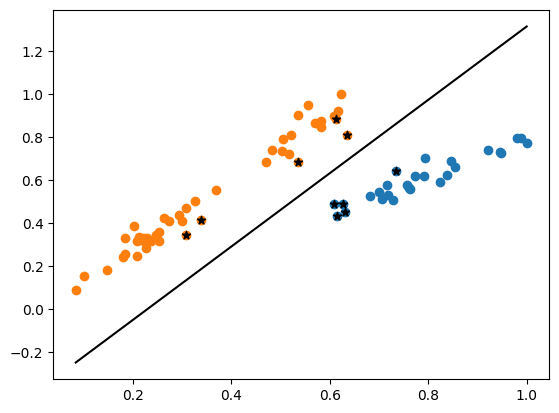

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("peces.csv")
df = df[df["Especie"].isin([2,4])]
X = df[["Alto", "Ancho"]]
y = LabelEncoder().fit_transform(df["Especie"]) 
X_scaled = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = SVC(kernel='linear', C=10)
clf.fit(X_train, y_train)
for clase in np.unique(y_train):
    plt.scatter(X_train[y_train == clase, 0], X_train[y_train == clase, 1], label=f"Clase {clase}")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c='k', marker='*', label='Vectores soporte')
m = -clf.coef_[0, 0] / clf.coef_[0, 1]
n = -clf.intercept_[0] / clf.coef_[0, 1]
x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
plt.plot(x_vals, m * x_vals + n, 'k-', label='Recta de decisión')
plt.show()  